<a href="https://colab.research.google.com/github/nkrish19/Credit-Approval-Prediction-using-Machine-Learning/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Initialization and Data Pre-processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# mandatory to execute this piece of code before run 
# mention all libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
from sklearn.preprocessing import StandardScaler
from torch import nn, optim
import torch
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

1. Data Preparation Old

In [ ]:
'''
Since the data we are using has alot of users than the number of transactions, 
we will only consider users who have made a transaction recently
first we will read the datasets into pandas dataframes
'''


'''
IMPORTANT
After mounting your drive, make a folder and make a folder named 'mlproject' and
then add both the datasets to this file
'''


client_info = pd.read_csv("/content/drive/My Drive/mlproject/application_record.csv")
client_record = pd.read_csv("/content/drive/My Drive/mlproject/credit_record.csv")


''' dropping occupation type as it has a lot of missing values'''
client_info = client_info.drop(columns=['OCCUPATION_TYPE'])
# print(client_info.columns)


'''for mapping gender values
we have 1 for Male and 0 for Female'''
client_info['CODE_GENDER'].replace({"M": 1, "F": 0}, inplace=True)
    

'''for mapping whether the client has a car
it will be 1 for yes and 0 for no'''
client_info["FLAG_OWN_CAR"].replace({"Y": 1, "N": 0}, inplace=True)


'''for mappping whether the client owns any real esate assents
again it will be 1 for 1 for yes and 0 for nonlocal'''
client_info["FLAG_OWN_REALTY"].replace({"Y": 1, "N": 0}, inplace=True)    


'''for mapping educational qualifications
we have not made dummy varaibles for this because we feel
higher educatonal qualifications should be given higher weight'''
client_info["NAME_EDUCATION_TYPE"].replace({"Higher education": 3, "Lower secondary": 0, "Secondary / secondary special": 1, "Incomplete higher": 2, "Academic degree":4}, inplace=True)


'''for mapping housing type
the value 0 would indicate a rented/municipal/office apartment 
or that the client lives with his parents whereas 1 would indicate a House/co-op apartment
the reason being that 1 would indicate that the person lives on a property that they own 
whereas 0 would indicate that it is not a permanent place'''
client_info["NAME_HOUSING_TYPE"].replace({"House / apartment":5, 'Co-op apartment':4, 'Municipal apartment':3, 'With parents':2, 'Office apartment':1, 'Rented apartment':0}, inplace=True)


'''for mapping income type
the value 0 would indicate a student/person living on pension 
whereas the value 1 would indicate a commercial associate or a person who 
is working or is a state servent. We have done so because a pensioner and 
a student are people who are not actively working and hence should be considered
into a different category from the people who are actively working'''
client_info['NAME_INCOME_TYPE'].replace({'Working':3, 'Commercial associate':4, 'Pensioner':1, 'State servant':2, 'Student':0}, inplace=True)


'''for mapping family status
we will classify marriage and civil marriage as 1 since they both indicate
that the person currently has a spouse and we will classify separated, single
and widow as 0 since in all of them the client has no spouse'''
client_info['NAME_FAMILY_STATUS'].replace({'Single / not married':2, 'Separated':1, 'Widow':0, 'Married':4, 'Civil marriage':3}, inplace=True)


''' for handling our response variable
so the variable STATUS will be our response variable
for loans that were paid as safe credit approvals whereas all
dues (all integer values) as unsafe credit approvals. The values assigned would be
1 and 0 respectively. We might have to change this depending on accuracy'''
client_record['STATUS'].replace({'C':1, 'X':1,'1':0,'0':0,'2':0,'3':0,'4':0,'5':0},inplace=True)




''' Merging the 2 datasets'''
data = client_record.merge(client_info, how = 'left', on = 'ID')
data = data.dropna()
data = data.reset_index()
data = data.drop(columns=['index']) 


''' Optional to use Standard Scalar but would likely give a better 
performance. It is a type of Standardazation'''


std_slc = StandardScaler()
std_slc.fit(data)
std_slc.transform(data)


Y = data['STATUS']
X = copy.deepcopy(data)
X = X.drop(columns = ['STATUS','ID']) 
# X.head()
# Y.head()
X.corr()

,MONTHS_BALANCE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
MONTHS_BALANCE,1.000000,0.013635,-0.003142,-0.008977,0.000913,0.001831,0.009282,0.001729,-0.008661,-0.016652,0.035756,-0.004222,NaN,0.001529,-0.005120,0.005288,-0.006276
CODE_GENDER,0.013635,1.000000,0.368554,-0.055791,0.103816,0.203889,0.154847,-0.009038,0.151090,-0.069209,0.203718,-0.172962,NaN,0.059027,-0.029471,-0.011710,0.138505
FLAG_OWN_CAR,-0.003142,0.368554,1.000000,-0.017764,0.109014,0.219579,0.146359,0.103914,0.160563,-0.014436,0.162202,-0.157830,NaN,0.019654,-0.014249,0.029040,0.156436
FLAG_OWN_REALTY,-0.008977,-0.055791,-0.017764,1.000000,-0.010621,0.039443,-0.068936,-0.011873,-0.009426,0.178151,-0.130354,0.092166,NaN,-0.210804,-0.061221,0.054065,-0.014404
CNT_CHILDREN,0.000913,0.103816,0.109014,-0.010621,1.000000,0.039304,0.170352,0.052216,0.151225,-0.028296,0.356177,-0.228945,NaN,0.042226,-0.018882,0.015726,0.892079
AMT_INCOME_TOTAL,0.001831,0.203889,0.219579,0.039443,0.039304,1.000000,0.200132,0.235910,0.013672,-0.010123,0.081231,-0.180674,NaN,-0.021229,0.018687,0.085776,0.031379
NAME_INCOME_TYPE,0.009282,0.154847,0.146359,-0.068936,0.170352,0.200132,1.000000,0.114034,0.097639,-0.073005,0.525633,-0.826532,NaN,0.186931,0.018401,0.087395,0.167806
NAME_EDUCATION_TYPE,0.001729,-0.009038,0.103914,-0.011873,0.052216,0.235910,0.114034,1.000000,0.019769,-0.004988,0.164976,-0.123122,NaN,0.016077,0.042472,0.095521,0.040308
NAME_FAMILY_STATUS,-0.008661,0.151090,0.160563,-0.009426,0.151225,0.013672,0.097639,0.019769,1.000000,0.021051,0.130603,-0.124867,NaN,0.058268,0.015143,0.003450,0.542242
NAME_HOUSING_TYPE,-0.016652,-0.069209,-0.014436,0.178151,-0.028296,-0.010123,-0.073005,-0.004988,0.021051,1.000000,-0.169492,0.092906,NaN,-0.024563,0.021113,-0.007705,-0.005305


1. Data Preparation Updated

0.0    35164
1.0     1293
dtype: int64

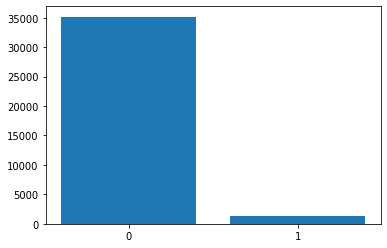

In [ ]:
"""
Make a folder named 'mlproject' and paste both the datasets
"""

client_info = pd.read_csv("/content/drive/My Drive/mlproject/application_record.csv")
client_record = pd.read_csv("/content/drive/My Drive/mlproject/credit_record.csv")

client_info.corr()
"""Dropping Columns"""
client_info = client_info.drop(['OCCUPATION_TYPE', "CNT_CHILDREN", "DAYS_BIRTH", "FLAG_MOBIL"], axis=1)


"""Creating Dummies"""
client_info = pd.get_dummies(client_info, columns = ["CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_EDUCATION_TYPE", "NAME_HOUSING_TYPE", "NAME_INCOME_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "FLAG_WORK_PHONE"], drop_first=True)


"""Handling DAYS_EMPLOYED"""
# client_info["DAYS_EMPLOYED"] = np.where(client_info["DAYS_EMPLOYED"] > 0, 1, client_info["DAYS_EMPLOYED"])


"""Defining Response Variable"""
client_record = client_record.drop(["MONTHS_BALANCE"], axis = 1)
client_record['STATUS'] = np.where((client_record['STATUS'] == 'X') | (client_record['STATUS'] == 'C'), -1, client_record['STATUS'])
client_record['STATUS'] = pd.to_numeric(client_record['STATUS'])
client_record = client_record.groupby(["ID"]).mean()
client_record["STATUS"] = np.where(client_record['STATUS']>0, 1, 0)


"""Merging the 2 datasets"""
data = client_record.merge(client_info, how='left', on='ID')
data = data.dropna()
data = data.reset_index()
data = data.drop(columns=['index'])
data = data.set_index('ID')
data = data.astype('float64')


"""Sampling the data"""
data = data.sample(frac = 1)


"""Creating numpy arrays and Scaling the data"""

y = data.pop("STATUS")
Y = y.to_numpy( )

std_slc = StandardScaler()
std_slc.fit(data)
std_slc.transform(data)

X = data.to_numpy()
temp = {'0':0, '1':0}
# print(Y)
for i in Y:
    temp[str(int(i))]+=1
plt.bar(temp.keys(),temp.values())
pd.DataFrame(Y).value_counts()

2. Different Techniques (weights/random Yunder/random over)


a. Weights 

In [ ]:
weights = {0:1, 1:30}
X_res = X
Y_res = Y
'''
barring naive bayes, every other method should have the option to add weights
as an input parameter class_weights=weights
'''
pd.DataFrame(Y).value_counts()

0.0    35164
1.0     1293
dtype: int64

b. Random Under

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
res = RandomUnderSampler()
X_res, Y_res = res.fit_resample(X, Y)

c. Random Over

In [ ]:
from imblearn.over_sampling import RandomOverSampler
res = RandomOverSampler()
X_res, Y_res = res.fit_resample(X, Y)

## Separation of Training and Testing set

In [ ]:
# define X_train, Y_train, X_test, Y_test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size=0.2, random_state=42)
Y_train = pd.DataFrame(Y_train)
Y_test = pd.DataFrame(Y_test)

##Base Models for machine learning 

1. Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42) 

2. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

3. KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
# use hit and train for hyper params

4. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight=weights)

5. SVC

In [ ]:
from sklearn.model_selection import GridSearchCV 
import pandas as pd 
import numpy as np 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.svm import SVC 
  
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
model = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
model.fit(X_train, Y_train) 

##Ensemble learning 

1. Random forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

2. XGBoosted Trees

In [ ]:
from xgboost import XGBClassifier 
model = XGBClassifier(max_depth=13, n_estimators=500, min_child_weight=10) # the hyper parameters of XgBoost are subject to change
# use hit and trail or GridSearchCV for hyper params

3. ADABoost

In [ ]:
# note this is not a defined method and will use one of the basic classifiers as input
from sklearn.ensemble import AdaBoostClassifier 
clf = AdaBoostClassifier(base_estimator=model,n_estimators=50)

4. Bagging 

In [ ]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator = model, n_estimators = 50, random_state = 42) 

## Neural Network

In [ ]:
input_size = X_train.shape[1]

X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
Y_train = torch.from_numpy(Y_train.to_numpy().reshape(Y_train.shape[0], 1)).type(torch.LongTensor)
Y_test = torch.from_numpy(Y_test.to_numpy().reshape(Y_test.shape[0], 1)).type(torch.LongTensor)

model = nn.Sequential(nn.Linear(input_size, 15),
                      nn.ReLU(),
                      nn.Linear(15, 2),
                      nn.Softmax(dim=1))

optimizer = optim.SGD(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

epochs = 10000

model.train()
for e in range(epochs):

    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, Y_train.squeeze_())
    loss.backward()
    optimizer.step()

Y_pred = model(X_test)

print("Accuracy")
print(accuracy_score(Y_test.detach().numpy(),Y_pred.detach().numpy()[:, 0]))


print("ROC_AUC")
print(roc_auc_score(Y_test.detach().numpy(),Y_pred.detach().numpy()[:, 0]))


print("Recall")
print(recall_score(Y_test.detach().numpy(),Y_pred.detach().numpy()[:, 0],average=None))


print("Precision")
print(precision_score(Y_test.detach().numpy(),Y_pred.detach().numpy()[:, 0],average=None))


print("F1 Score")
print(f1_score(Y_test.detach().numpy(),Y_pred.detach().numpy()[:, 0],average=None))

print("Confusion Matrix")
print(confusion_matrix(Y_test.detach().numpy(),Y_pred.detach().numpy()[:, 0]))

##Training the model

In [ ]:
# For most models
model.fit(X_train,Y_train)
# For Bagging And ADABoost
# clf.fit(X_train,Y_train)

##Performance

In [ ]:
# define various metrics
# accuracy, auc_roc, f1, recall, precision

Y_pred = model.predict(X_test)
# Y_pred = clf.predict(X_test)

print("Accuracy")
print(accuracy_score(Y_test,Y_pred))


print("ROC_AUC")
print(roc_auc_score(Y_test,Y_pred))


print("Recall")
print(recall_score(Y_test,Y_pred,average=None))


print("Precision")
print(precision_score(Y_test,Y_pred,average=None))
print(precision_score(Y_test,Y_pred,average='macro'))


print("F1 Score")
print(f1_score(Y_test,Y_pred,average=None))

print("Confusion Matrix")
print(confusion_matrix(Y_test,Y_pred))